# データスクレイピング

In [82]:
import pandas as pd
import sqlite3
import requests
from bs4 import BeautifulSoup
import re

# ベースURL
url_list = ['https://www.jalan.net/yad382598/kuchikomi/?screenId=UWW3001&yadNo=382598&smlCd=136802&distCd=01&ccnt=lean-kuchikomi-link-2','https://www.jalan.net/yad343292/kuchikomi/2.HTML?rootCd=04&roomCrack=200000&maxPrice=999999&screenId=UWW3701&idx=30&smlCd=137102&stayYear=2025&stayMonth=1&stayDay=23&stayCount=1&adultNum=2&roomCount=1&minPrice=0&yadNo=343292&distCd=01','https://www.jalan.net/yad343292/kuchikomi/3.HTML?maxPrice=999999&rootCd=04&roomCrack=200000&screenId=UWW3701&idx=60&smlCd=137102&stayYear=2025&stayMonth=1&stayDay=23&stayCount=1&adultNum=2&roomCount=1&minPrice=0&yadNo=343292&distCd=01','https://www.jalan.net/yad343292/kuchikomi/4.HTML?maxPrice=999999&rootCd=04&roomCrack=200000&screenId=UWW3701&idx=90&smlCd=137102&stayYear=2025&stayMonth=1&stayDay=23&stayCount=1&adultNum=2&roomCount=1&minPrice=0&yadNo=343292&distCd=01','https://www.jalan.net/yad343292/kuchikomi/5.HTML?roomCrack=200000&maxPrice=999999&rootCd=04&screenId=UWW3701&idx=120&smlCd=137102&stayYear=2025&stayMonth=1&stayDay=23&stayCount=1&adultNum=2&roomCount=1&minPrice=0&yadNo=343292&distCd=01','https://www.jalan.net/yad343292/kuchikomi/6.HTML?maxPrice=999999&rootCd=04&roomCrack=200000&screenId=UWW3701&idx=150&smlCd=137102&stayYear=2025&stayMonth=1&stayDay=23&stayCount=1&adultNum=2&roomCount=1&minPrice=0&yadNo=343292&distCd=01','https://www.jalan.net/yad343292/kuchikomi/7.HTML?maxPrice=999999&rootCd=04&roomCrack=200000&screenId=UWW3701&idx=180&smlCd=137102&stayYear=2025&stayMonth=1&stayDay=23&stayCount=1&adultNum=2&roomCount=1&minPrice=0&yadNo=343292&distCd=01',]


# スクレイピング結果を格納するリスト
post_body_text = []
lead_text = []
plan_info_text = []
post_date_text = []
rate_list_text = []
hotel_name_text = []
integrated_rate_text = []
cat_table_text = []
c_label_text = []
total_rate_text = []  # 総合評価を格納するリスト

# スクレイピング処理
for row in url_list:
    html = requests.get(row)
    soup = BeautifulSoup(html.content, 'html.parser')

    # 各要素を抽出
    post_body = soup.find_all("p", class_='jlnpc-kuchikomiCassette__postBody')
    lead = soup.find_all("p", class_='jlnpc-kuchikomiCassette__lead')
    plan_info = soup.find_all("dl", class_='jlnpc-kuchikomiCassette__planInfoList')
    post_date = soup.find_all("p", class_='jlnpc-kuchikomiCassette__postDate')
    rate_list = soup.find_all("dl", class_='jlnpc-kuchikomiCassette__rateList')
    hotel_name = soup.find_all("p", class_='jlnpc-styleguide-scope jlnpc-yado__subTitle')
    rating = soup.find_all('span', class_='jlnpc-kuchikomi__point')
    cat_table = soup.find_all("table", class_='jlnpc-kuchikomi__catTable')
    c_label = soup.find_all("span", class_='c-label')
    total_rate = soup.find_all("div", class_="jlnpc-kuchikomiCassette__totalRate")  # 総合評価

    # テキストを抽出し、リストに格納
    post_body_text.extend([element.get_text().strip() for element in post_body])
    lead_text.extend([element.get_text().strip() for element in lead])
    plan_info_text.extend([element.get_text().strip() for element in plan_info])
    post_date_text.extend([element.get_text().strip() for element in post_date])
    rate_list_text.extend([element.get_text().strip() for element in rate_list])
    hotel_name_text.extend([element.get_text().strip() for element in hotel_name])
    integrated_rate_text.extend([element.get_text().strip() for element in rating])
    cat_table_text.extend([element.get_text().strip() for element in cat_table])
    c_label_text.extend([element.get_text().strip() for element in c_label])
    total_rate_text.extend([element.get_text().strip() for element in total_rate])  # 総合評価を追加

# データ処理
sex = []
age = []
purpose = []
room_type = []
meal_type = []
post_date_text_v2 = []
periods = []
plans = []
prices = []
low_prices = []
high_prices = []
room_ratings = []
bath_ratings = []
breakfast_ratings = []
dinner_ratings = []
service_ratings = []
cleanliness_ratings = []

# 性別、年齢、用途、部屋タイプ、食事タイプを抽出
for i in range(0, len(c_label_text), 4):
    sex_age = c_label_text[i].strip().split('/')
    if len(sex_age) == 2:
        sex.append(sex_age[0])
        age.append(sex_age[1])
    else:
        sex.append(None)
        age.append(None)

    purpose.append(c_label_text[i + 1].strip() if i + 1 < len(c_label_text) else None)
    room_type.append(c_label_text[i + 2].strip() if i + 2 < len(c_label_text) else None)
    meal_type.append(c_label_text[i + 3].strip() if i + 3 < len(c_label_text) else None)

# 投稿日の抽出
date_pattern = r'\d{4}/\d{1,2}/\d{1,2}'
post_date_text_v2 = [re.search(date_pattern, text).group() if re.search(date_pattern, text) else None for text in post_date_text]

# プラン情報の処理
for item in plan_info_text:
    if item.startswith('時期'):
        periods.append(item.split('\n')[1].split('宿泊')[0])
    elif item.startswith('プラン'):
        plans.append(item.split('\n')[1])
    elif item.startswith('価格帯'):
        price_text = item.split('\n')[-1].split('円')[0]
        prices.append(price_text)
        if '〜' in price_text or '～' in price_text:
            separator = '〜' if '〜' in price_text else '～'
            low_prices.append(price_text.split(separator)[0])
            high_prices.append(price_text.split(separator)[1])
        else:
            low_prices.append(None)
            high_prices.append(None)

# レビュー評価の処理
for item in rate_list_text:
    lines = item.split('\n')
    for i in range(0, len(lines), 2):
        category = lines[i]
        rating = lines[i + 1] if i + 1 < len(lines) else None
        if '部屋' in category:
            room_ratings.append(rating)
        elif '風呂' in category:
            bath_ratings.append(rating)
        elif '料理(朝食)' in category:
            breakfast_ratings.append(rating)
        elif '料理(夕食)' in category:
            dinner_ratings.append(rating)
        elif '接客・サービス' in category:
            service_ratings.append(rating)
        elif '清潔感' in category:
            cleanliness_ratings.append(rating)

# 欠損値の補完（リストの長さを揃える）
def adjust_list_length(target_list, length):
    return target_list + [None] * (length - len(target_list))

max_length = max(len(post_body_text), len(sex), len(total_rate_text))
for key in [post_body_text, lead_text, plan_info_text, post_date_text_v2, sex, age, purpose, room_type, meal_type, periods, plans, prices, low_prices, high_prices, room_ratings, bath_ratings, breakfast_ratings, dinner_ratings, service_ratings, cleanliness_ratings, total_rate_text]:
    key[:] = adjust_list_length(key, max_length)

# DataFrameの作成
data = pd.DataFrame({
    '投稿者性別': sex,
    '年齢': age,
    '利用目的': purpose,
    '部屋タイプ': room_type,
    '食事プラン': meal_type,
    '投稿本文': post_body_text,
    '投稿リード': lead_text,
    '投稿日時': post_date_text_v2,
    '宿泊時期': periods,
    'プラン': plans,
    '価格帯': prices,
    '最低価格': low_prices,
    '最高価格': high_prices,
    '部屋評価': room_ratings,
    '風呂評価': bath_ratings,
    '朝食評価': breakfast_ratings,
    '夕食評価': dinner_ratings,
    '接客評価': service_ratings,
    '清潔感評価': cleanliness_ratings,
    '総合評価': total_rate_text  # 総合評価を追加
})

# SQLite データベースに保存
db_connection = sqlite3.connect('reviews.db')
data.to_sql('reviews', db_connection, if_exists='replace', index=False)
db_connection.close()

print("データが正常にデータベースに保存されました。")


データが正常にデータベースに保存されました。


# 男性と女性のデータ数を比較

/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/3215998010.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


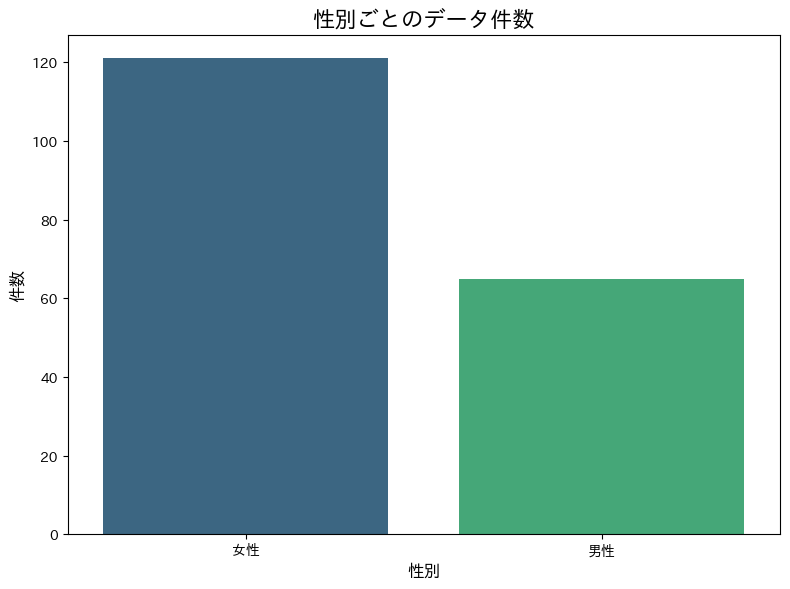

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

def visualize_gender_distribution(data):
    """
    性別ごとのデータ件数を可視化。
    :param data: pandas.DataFrame
    """
    # 性別ごとの件数を集計
    gender_counts = data['投稿者性別'].value_counts()

    # 可視化
    plt.figure(figsize=(8, 6))
    sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
    plt.title('性別ごとのデータ件数', fontsize=16)
    plt.xlabel('性別', fontsize=12)
    plt.ylabel('件数', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# データベースパス
db_path = "reviews.db"

# データを取得
query = """
    SELECT 投稿者性別
    FROM reviews
"""
raw_data = pd.read_sql_query(query, sqlite3.connect(db_path))

# 可視化を実行
visualize_gender_distribution(raw_data)


# 欠損値の補完

In [85]:
import pandas as pd
import sqlite3

# データ取得と欠損値補完
def fetch_and_preprocess_data(db_path):
    """
    SQLiteデータベースからデータを取得し、欠損値を補完する。
    :param db_path: SQLiteデータベースのパス
    :return: pandas.DataFrame
    """
    query = """
        SELECT 
            投稿者性別, 総合評価, 部屋評価, 風呂評価, 朝食評価, 
            接客評価, 清潔感評価
        FROM reviews
    """
    # データベースからデータを取得
    with sqlite3.connect(db_path) as conn:
        data = pd.read_sql_query(query, conn)

    # 総合評価および評価項目を数値型に変換
    for col in ['総合評価', '部屋評価', '風呂評価', '朝食評価', '接客評価', '清潔感評価']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # 欠損値の補完（数値型の列だけを対象）
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    return data

# データベースパスを指定
db_path = "reviews.db"

# データを取得して欠損値を補完
processed_data = fetch_and_preprocess_data(db_path)
print(processed_data)


    投稿者性別  総合評価  部屋評価  風呂評価      朝食評価  接客評価  清潔感評価
0      男性     5     5   5.0  5.000000     5      5
1      女性     5     5   5.0  3.985294     5      5
2      女性     5     5   4.0  3.985294     5      5
3      男性     5     5   4.0  3.985294     5      5
4      男性     5     5   4.0  3.985294     4      4
..    ...   ...   ...   ...       ...   ...    ...
181    女性     3     4   3.0  3.985294     3      4
182    女性     4     4   3.0  3.985294     3      3
183    女性     4     3   3.0  5.000000     3      3
184    女性     3     3   3.0  3.985294     3      3
185    女性     3     4   4.0  3.985294     3      4

[186 rows x 7 columns]


# 性別ごとにデータを分類

In [86]:
import pandas as pd
import sqlite3

# データ取得と欠損値補完
def fetch_and_preprocess_data(db_path):
    """
    SQLiteデータベースからデータを取得し、欠損値を補完する。
    :param db_path: SQLiteデータベースのパス
    :return: pandas.DataFrame
    """
    query = """
        SELECT 
            投稿者性別, 総合評価, 部屋評価, 風呂評価, 朝食評価, 
            夕食評価, 接客評価, 清潔感評価
        FROM reviews
    """
    # データベースからデータを取得
    with sqlite3.connect(db_path) as conn:
        data = pd.read_sql_query(query, conn)

    # 総合評価および評価項目を数値型に変換
    for col in ['総合評価', '部屋評価', '風呂評価', '朝食評価', '接客評価', '清潔感評価']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # 欠損値の補完（数値型の列だけを対象）
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    return data

# 性別でデータを分割
def split_by_gender(data):
    """
    性別でデータを分割。
    :param data: pandas.DataFrame
    :return: 男性データ、女性データのタプル
    """
    male_data = data[data['投稿者性別'] == '男性']
    female_data = data[data['投稿者性別'] == '女性']
    return male_data, female_data

# データベースパスを指定
db_path = "reviews.db"

# データを取得して欠損値を補完
processed_data = fetch_and_preprocess_data(db_path)

# 男性データと女性データに分割
male_data, female_data = split_by_gender(processed_data)

# 分割したデータを表示
print("男性データ:\n", male_data)
print("\n女性データ:\n", female_data)


男性データ:
     投稿者性別  総合評価  部屋評価  風呂評価      朝食評価 夕食評価  接客評価  清潔感評価
0      男性     5     5   5.0  5.000000    -     5      5
3      男性     5     5   4.0  3.985294    -     5      5
4      男性     5     5   4.0  3.985294    -     4      4
5      男性     5     5   5.0  3.985294    -     5      5
7      男性     3     3   3.0  3.985294    -     3      3
..    ...   ...   ...   ...       ...  ...   ...    ...
166    男性     5     5   5.0  5.000000    -     5      5
172    男性     3     1   2.0  3.985294    -     4      4
173    男性     2     1   3.0  3.985294    -     2      1
174    男性     2     3   2.0  3.985294    -     1      4
179    男性     3     2   2.0  3.985294    -     3      2

[65 rows x 8 columns]

女性データ:
     投稿者性別  総合評価  部屋評価  風呂評価      朝食評価 夕食評価  接客評価  清潔感評価
1      女性     5     5   5.0  3.985294    -     5      5
2      女性     5     5   4.0  3.985294    -     5      5
6      女性     5     5   5.0  3.985294    -     5      5
8      女性     5     4   4.0  3.985294    -     3      2
9      女

# 散布図

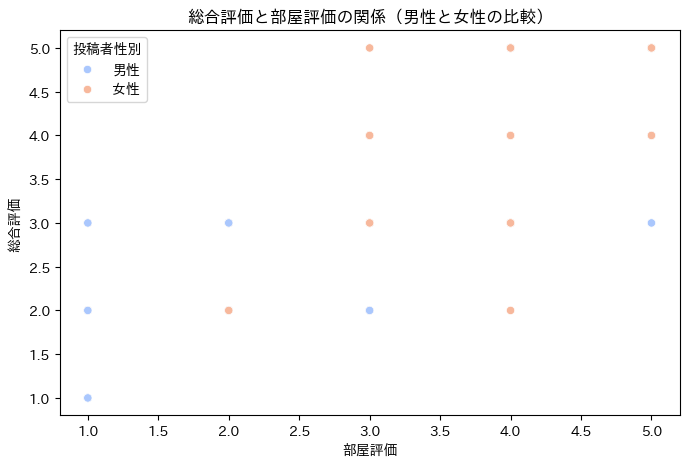

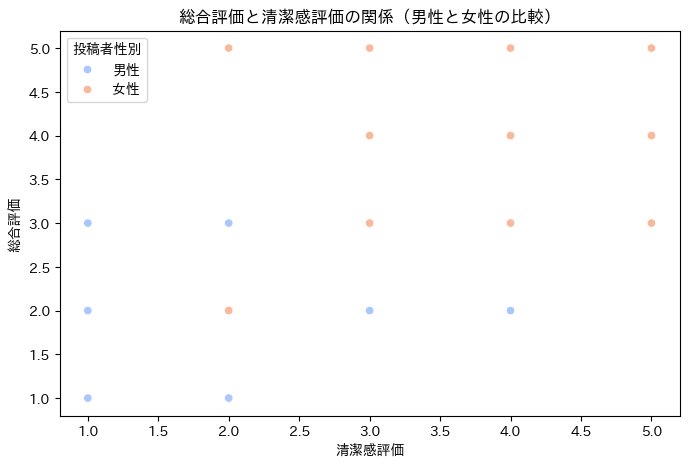

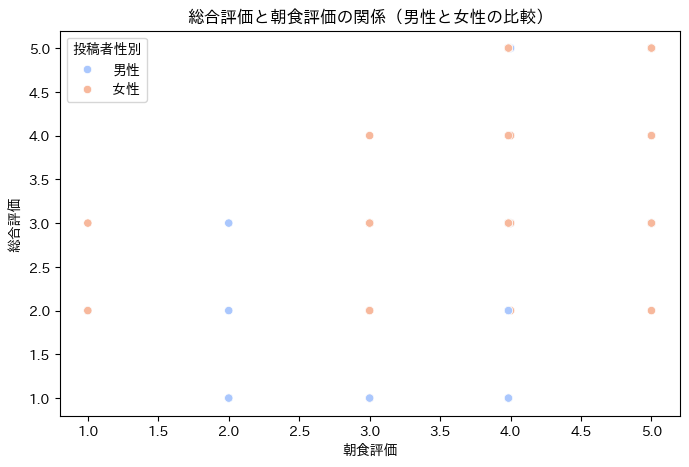

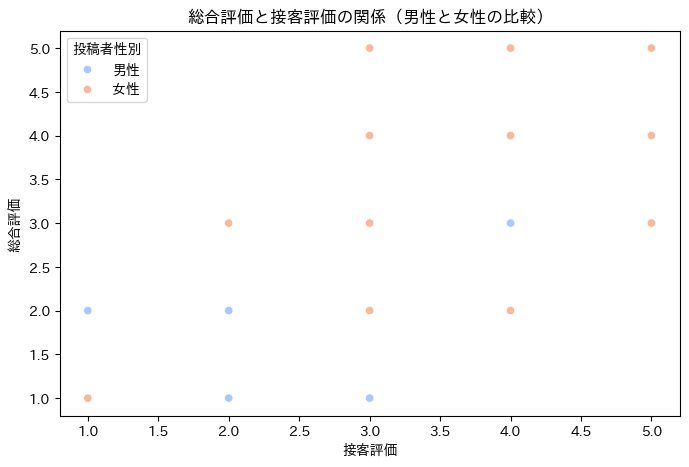

In [94]:
def scatter_plot_by_gender(data, feature):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y="総合評価", hue="投稿者性別", palette="coolwarm")
    plt.title(f"総合評価と{feature}の関係（男性と女性の比較）")
    plt.xlabel(feature)
    plt.ylabel("総合評価")
    plt.show()

# 特徴量ごとに散布図をプロット
for feature in ['部屋評価', '清潔感評価', '朝食評価', '接客評価']:
    scatter_plot_by_gender(processed_data, feature)


# 箱ひげ図

/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/2209131417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="投稿者性別", y=feature, palette="coolwarm")


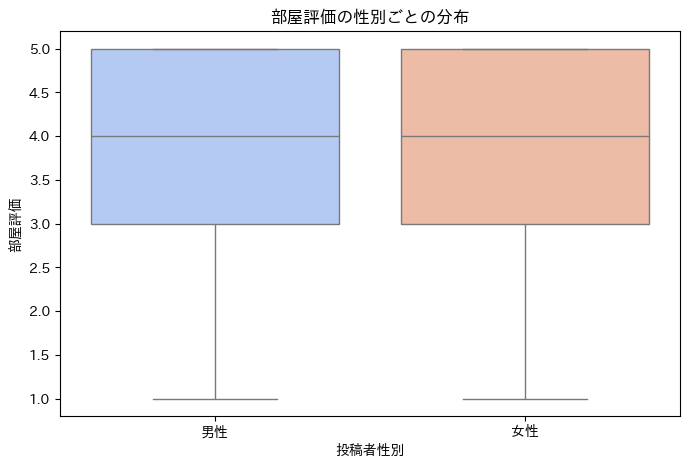

/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/2209131417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="投稿者性別", y=feature, palette="coolwarm")


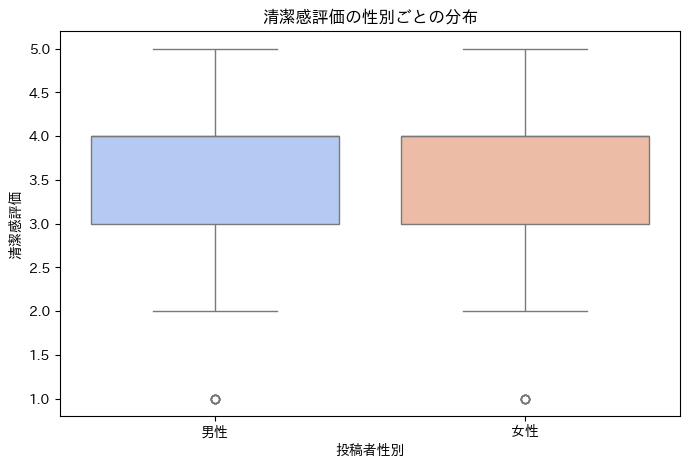

/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/2209131417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="投稿者性別", y=feature, palette="coolwarm")


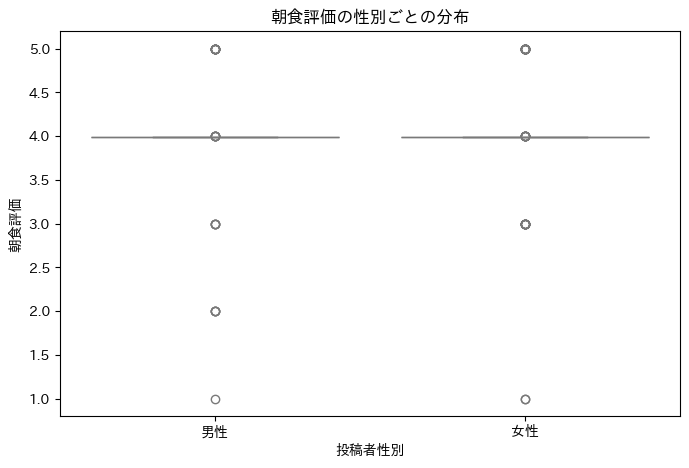

/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/2209131417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="投稿者性別", y=feature, palette="coolwarm")


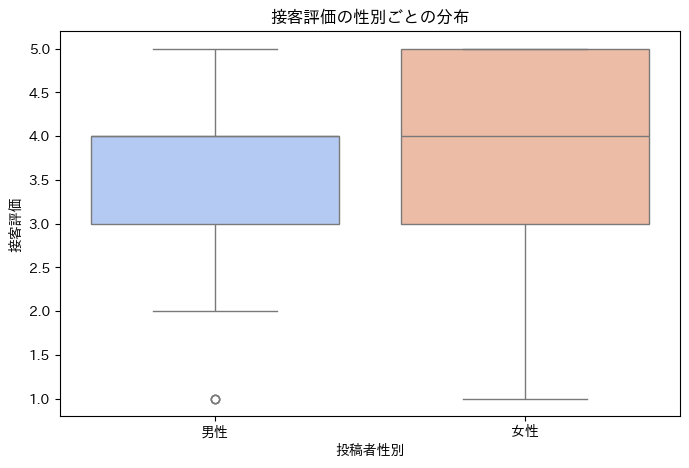

In [93]:
def box_plot_by_gender(data, feature):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x="投稿者性別", y=feature, palette="coolwarm")
    plt.title(f"{feature}の性別ごとの分布")
    plt.xlabel("投稿者性別")
    plt.ylabel(feature)
    plt.show()

# 各特徴量の箱ひげ図を描画
for feature in ['部屋評価', '清潔感評価', '朝食評価', '接客評価']:
    box_plot_by_gender(processed_data, feature)


In [95]:
def calculate_correlation(data, gender):
    subset = data[data["投稿者性別"] == gender]
    corr_matrix = subset[['総合評価', '部屋評価', '清潔感評価', '朝食評価', '接客評価']].corr()
    print(f"\n{gender}の相関係数:\n", corr_matrix['総合評価'].sort_values(ascending=False))

# 男性と女性の相関分析
calculate_correlation(processed_data, "男性")
calculate_correlation(processed_data, "女性")



男性の相関係数:
 総合評価     1.000000
部屋評価     0.857441
清潔感評価    0.834549
接客評価     0.774313
朝食評価     0.492630
Name: 総合評価, dtype: float64

女性の相関係数:
 総合評価     1.000000
部屋評価     0.805513
清潔感評価    0.781163
接客評価     0.561935
朝食評価     0.403186
Name: 総合評価, dtype: float64


In [96]:
from sklearn.linear_model import LinearRegression

def linear_regression_analysis(data, gender):
    subset = data[data["投稿者性別"] == gender]
    X = subset[['部屋評価', '清潔感評価', '朝食評価', '接客評価']]
    y = subset['総合評価']
    model = LinearRegression().fit(X, y)
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    }).sort_values(by="Coefficient", ascending=False)
    print(f"\n{gender}の回帰係数:\n", coefficients)

# 男性と女性の線形回帰分析
linear_regression_analysis(processed_data, "男性")
linear_regression_analysis(processed_data, "女性")



男性の回帰係数:
   Feature  Coefficient
0    部屋評価     0.408781
3    接客評価     0.322463
1   清潔感評価     0.257930
2    朝食評価     0.105385

女性の回帰係数:
   Feature  Coefficient
0    部屋評価     0.437585
1   清潔感評価     0.294771
2    朝食評価     0.278123
3    接客評価     0.097441


# 男性と女性のデータに分けて総合評価と他の評価指標との相関関係と、影響度の可視化


男性の総合評価分析：


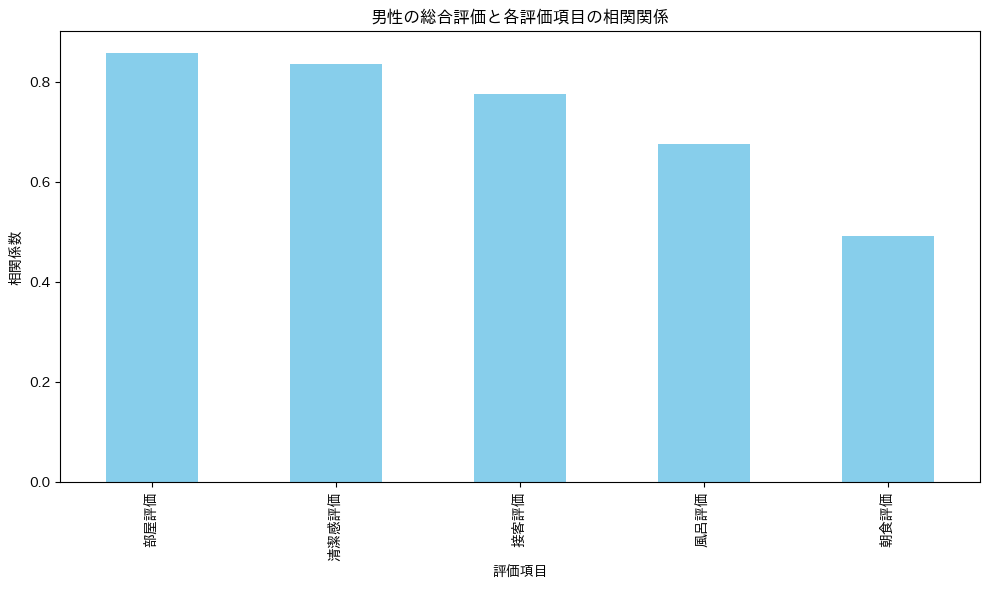

/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/3116888231.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')


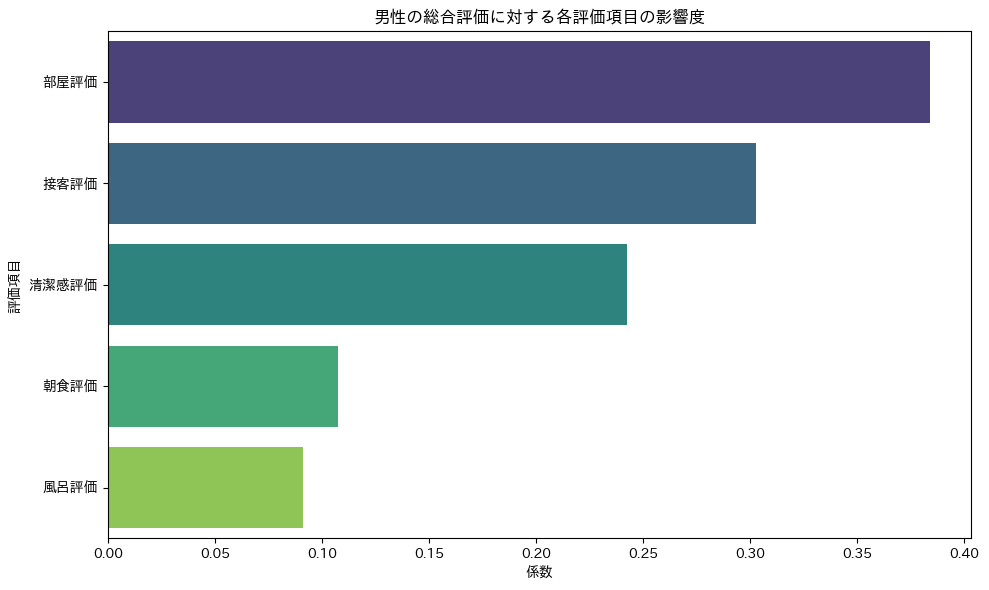


女性の総合評価分析：


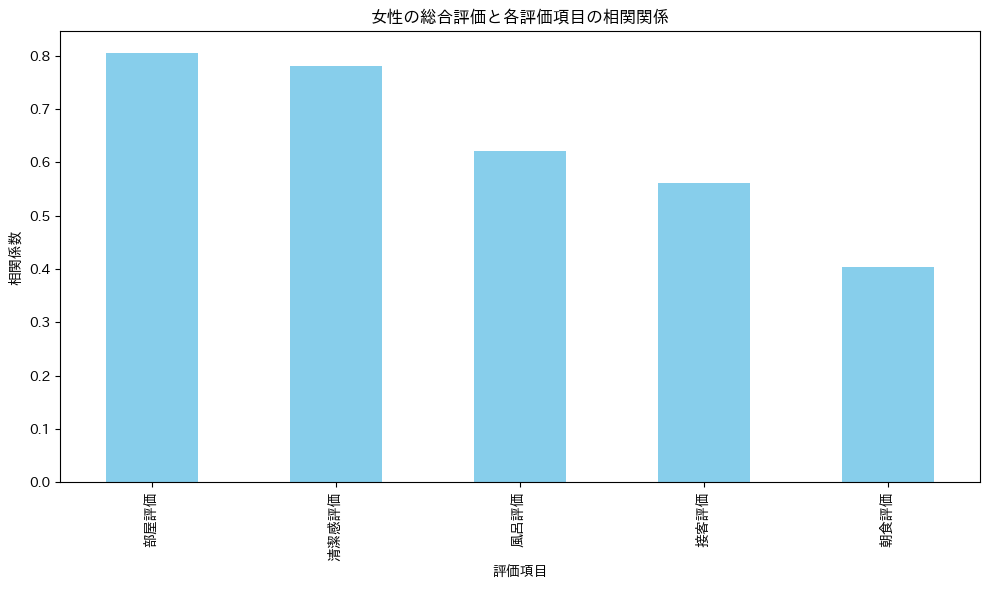

/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/3116888231.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')


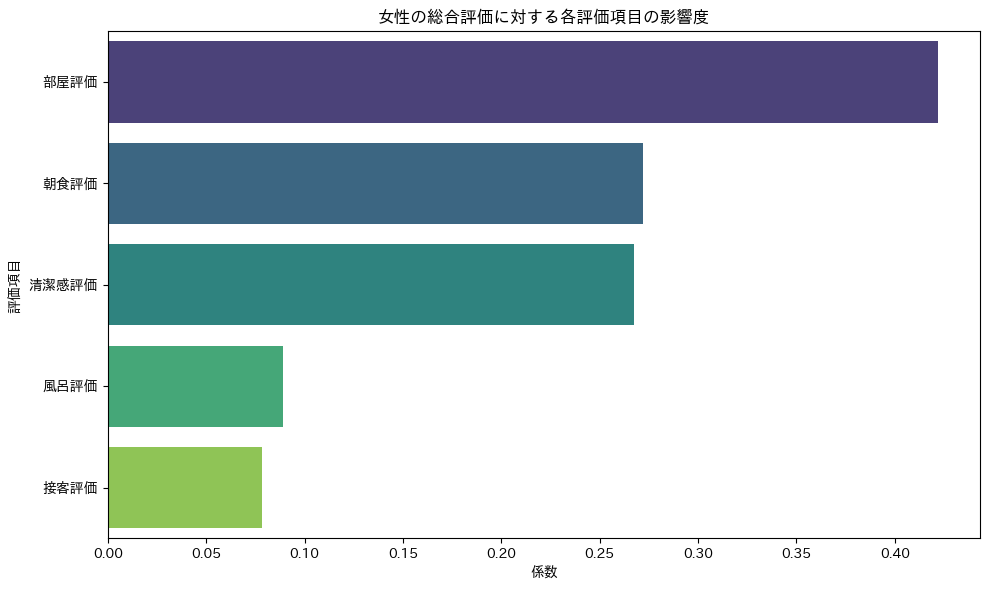

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

# 相関係数の計算と線形回帰分析
def analyze_gender_impact(data, gender_label):
    """
    総合評価に影響を与える評価項目を分析。
    :param data: pandas.DataFrame（男性または女性のデータ）
    :param gender_label: 性別ラベル（"男性" または "女性"）
    :return: 相関係数、線形回帰モデルの結果（係数、F値、P値）
    """
    # 相関係数の計算
    corr_matrix = data[['総合評価', '部屋評価', '風呂評価', '朝食評価', '接客評価', '清潔感評価']].corr()

    # 線形回帰モデルの構築
    X = data[['部屋評価', '風呂評価', '朝食評価', '接客評価', '清潔感評価']]
    y = data['総合評価']

    model = LinearRegression().fit(X, y)

    # F値とP値の計算
    f_values, p_values = f_regression(X, y)

    # 結果をまとめる
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_,
        'F-Value': f_values,
        'P-Value': p_values
    }).sort_values('Coefficient', ascending=False)

    return corr_matrix['総合評価'], coefficients

# 可視化
def visualize_results(corr, coefficients, gender_label):
    """
    結果を可視化する。
    :param corr: 相関係数シリーズ
    :param coefficients: 線形回帰モデルの結果データフレーム
    :param gender_label: 性別ラベル（"男性" または "女性"）
    """
    # 相関係数の可視化
    plt.figure(figsize=(10, 6))
    corr.drop('総合評価').sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title(f"{gender_label}の総合評価と各評価項目の相関関係")
    plt.ylabel("相関係数")
    plt.xlabel("評価項目")
    plt.tight_layout()
    plt.show()

    # 線形回帰の係数の可視化
    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')
    plt.title(f"{gender_label}の総合評価に対する各評価項目の影響度")
    plt.xlabel("係数")
    plt.ylabel("評価項目")
    plt.tight_layout()
    plt.show()

# データ取得（前回コードから呼び出し）
db_path = "reviews.db"
processed_data = fetch_and_preprocess_data(db_path)

# 男性と女性でデータを分割
male_data, female_data = split_by_gender(processed_data)

# 男性データの分析
print("\n男性の総合評価分析：")
male_corr, male_coefficients = analyze_gender_impact(male_data, "男性")
visualize_results(male_corr, male_coefficients, "男性")

# 女性データの分析
print("\n女性の総合評価分析：")
female_corr, female_coefficients = analyze_gender_impact(female_data, "女性")
visualize_results(female_corr, female_coefficients, "女性")


# ランダムフォレスト回帰による特徴量重要度分析


男性の特徴量重要度分析：

男性データでのモデル評価:
平均二乗誤差 (MSE): 0.17523538295831154
決定係数 (R^2): 0.8712400881741102


/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/3834841674.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='coolwarm')


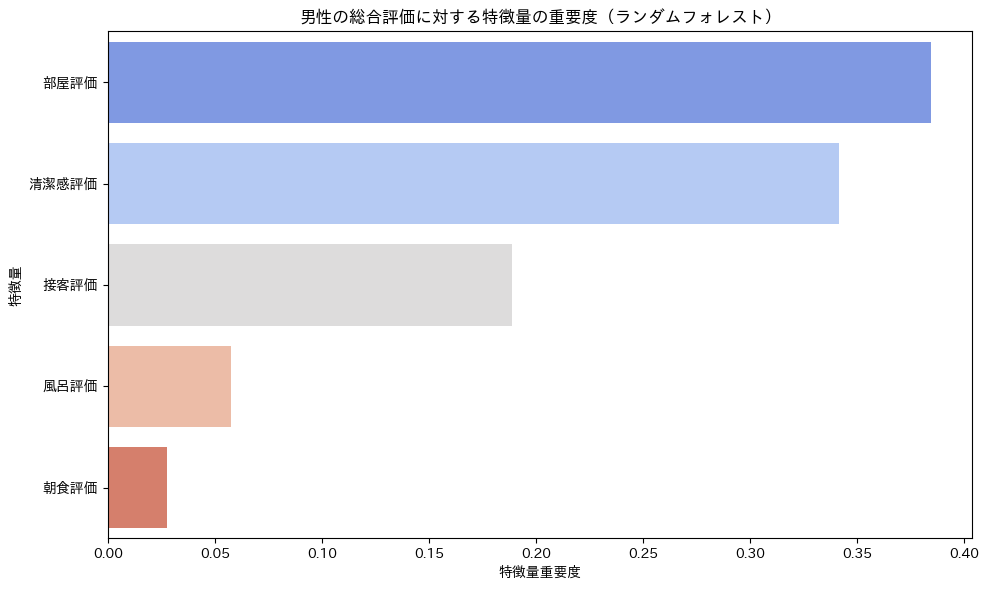


女性の特徴量重要度分析：

女性データでのモデル評価:
平均二乗誤差 (MSE): 0.19605171557823126
決定係数 (R^2): 0.7625342592317935


/var/folders/l3/ckqz49rj4712srbds7yzm4kh0000gn/T/ipykernel_54553/3834841674.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='coolwarm')


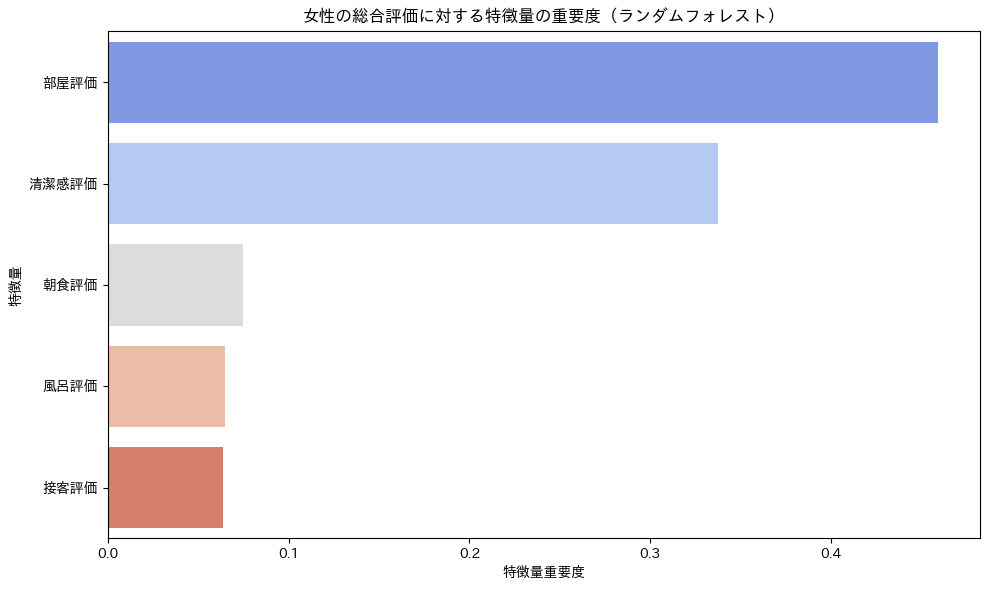

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ランダムフォレスト回帰による特徴量の重要度を計算
def random_forest_feature_importance(data, gender_label):
    """
    ランダムフォレスト回帰を使用して特徴量の重要度を計算。
    :param data: pandas.DataFrame（男性または女性のデータ）
    :param gender_label: 性別ラベル（"男性" または "女性"）
    :return: 特徴量重要度データフレーム
    """
    # 特徴量と目的変数を設定
    X = data[['部屋評価', '風呂評価', '朝食評価',  '接客評価', '清潔感評価']]
    y = data['総合評価']

    # データを訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ランダムフォレストモデルを構築
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 特徴量の重要度を取得
    importance = model.feature_importances_

    # テストデータでモデルを評価
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{gender_label}データでのモデル評価:")
    print(f"平均二乗誤差 (MSE): {mse}")
    print(f"決定係数 (R^2): {r2}")

    # 特徴量重要度をデータフレームにまとめる
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    return feature_importance

# 可視化
def visualize_feature_importance(feature_importance, gender_label):
    """
    特徴量の重要度を可視化。
    :param feature_importance: 特徴量重要度データフレーム
    :param gender_label: 性別ラベル（"男性" または "女性"）
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='coolwarm')
    plt.title(f"{gender_label}の総合評価に対する特徴量の重要度（ランダムフォレスト）")
    plt.xlabel("特徴量重要度")
    plt.ylabel("特徴量")
    plt.tight_layout()
    plt.show()

# データ取得（前回コードから呼び出し）
db_path = "reviews.db"
processed_data = fetch_and_preprocess_data(db_path)

# 男性と女性でデータを分割
male_data, female_data = split_by_gender(processed_data)

# 男性データのランダムフォレスト分析
print("\n男性の特徴量重要度分析：")
male_feature_importance = random_forest_feature_importance(male_data, "男性")
visualize_feature_importance(male_feature_importance, "男性")

# 女性データのランダムフォレスト分析
print("\n女性の特徴量重要度分析：")
female_feature_importance = random_forest_feature_importance(female_data, "女性")
visualize_feature_importance(female_feature_importance, "女性")
